<a href="https://colab.research.google.com/github/takakurahashi/github.io/blob/master/iris_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# ライブラリをロード
from keras.layers import Dense
from tensorflow.keras import layers, models
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [9]:
# 必要なライブラリの読み込み
import numpy as np

from sklearn.datasets import load_iris
iris_dataset = load_iris()

# この処理が重要　one-hotエンコーディング
from keras.utils import np_utils
data_y = np_utils.to_categorical(iris_dataset['target'])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
  iris_dataset['data'],data_y,random_state=0
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test)

(112, 4)
(38, 4)
(112, 3)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [10]:
# オブジェクトのインスタンス化
# ニューラルネットワークの作成を開始
network = models.Sequential()

In [11]:
# 活性化関数としてReLUを用いる全結合層を追加
network.add(Dense(units=10, activation="relu", input_shape=(4,)))

In [12]:
# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(Dense(units=3, activation="softmax"))

In [13]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [14]:
# ニューラルネットワークをコンパイル
network.compile(loss="categorical_crossentropy", # クロスエントロピ
                optimizer="adam", 
                metrics=["accuracy"]) # 性能指標は精度

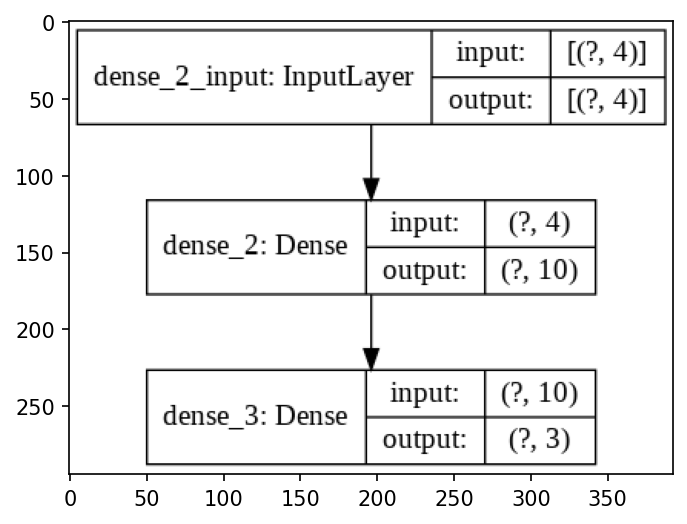

In [15]:
# モデル構造の出力を出力します
plot_model(network, "model_iris.png", show_layer_names=True, show_shapes=True)
# モデル構造を可視化します
image = plt.imread("model_iris.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()

In [16]:
# fitの学習
network.fit(X_train, y_train,batch_size=32, epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 0s 38ms/step - loss: 1.1622 - accuracy: 0.3661 - val_loss: 1.3340 - val_accuracy: 0.2368
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1477 - accuracy: 0.3661 - val_loss: 1.3104 - val_accuracy: 0.2368
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1358 - accuracy: 0.3661 - val_loss: 1.2881 - val_accuracy: 0.2368
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 1.1247 - accuracy: 0.3661 - val_loss: 1.2670 - val_accuracy: 0.2368
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1130 - accuracy: 0.3661 - val_loss: 1.2492 - val_accuracy: 0.2368
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1045 - accuracy: 0.3661 - val_loss: 1.2321 - val_accuracy: 0.2368
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0965 - accuracy: 0.3661 - val_loss: 1.2161 - val_accuracy: 0.2368
Epoch 8/100
4/4 [=========

In [17]:
score = network.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

2/2 [==============================] - 0s 2ms/step - loss: 0.9085 - accuracy: 0.5526
正解率= 0.5526315569877625 loss= 0.9084768891334534


In [18]:
X_new = np.array([[5,2.9,1,0.2]])

prediction = network.predict(X_new)
print('------------予測--------------')
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][np.argmax(prediction)]))

------------予測--------------
Prediction: [[0.41281682 0.32984254 0.25734067]]
Predicted target name: setosa
